Correlation Coefficients:
  Pearson  = 0.9196  -> Strong Correlation
  Spearman = 0.9563 -> Strong Correlation
  Kendall  = 0.8686  -> Strong Correlation


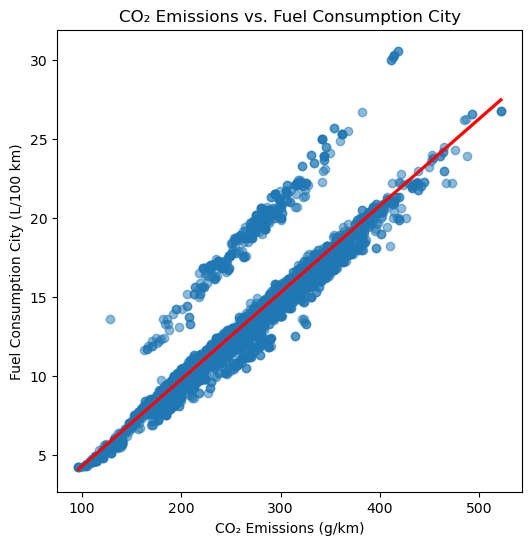

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def interpret_correlation(corr_value):
    """
    Returns a simple interpretation of the correlation coefficient.
    You can modify the thresholds or add more categories if desired.
    """
    abs_val = abs(corr_value)
    if abs_val >= 0.7:
        return "Strong Correlation"
    elif abs_val >= 0.3:
        return "Moderate Correlation"
    else:
        return "Weak Correlation"

def main():
    # 1. Load the dataset
    file_path = "CO2 Emissions_Canada.csv"  # Modify with your path
    df = pd.read_csv(file_path)
    
    # 2. Specify the columns of interest
    co2_col   = "CO2 Emissions(g/km)"
    fuel_col  = "Fuel Consumption City (L/100 km)"
    
    # 3. Drop rows with missing values in the two columns of interest
    df_sub = df[[co2_col, fuel_col]].dropna()
    
    # 4. Calculate Pearson, Spearman, and Kendall correlations
    pearson_corr  = df_sub[co2_col].corr(df_sub[fuel_col], method="pearson")
    spearman_corr = df_sub[co2_col].corr(df_sub[fuel_col], method="spearman")
    kendall_corr  = df_sub[co2_col].corr(df_sub[fuel_col], method="kendall")
    
    # 5. Print the correlation results with simple interpretation
    print("Correlation Coefficients:")
    print(f"  Pearson  = {pearson_corr:.4f}  -> {interpret_correlation(pearson_corr)}")
    print(f"  Spearman = {spearman_corr:.4f} -> {interpret_correlation(spearman_corr)}")
    print(f"  Kendall  = {kendall_corr:.4f}  -> {interpret_correlation(kendall_corr)}")
    
    # 6. Plot a scatter plot with a regression line
    plt.figure(figsize=(6, 6))
    sns.regplot(x=co2_col, y=fuel_col, data=df_sub, 
                scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
    plt.title("CO₂ Emissions vs. Fuel Consumption City")
    plt.xlabel("CO₂ Emissions (g/km)")
    plt.ylabel("Fuel Consumption City (L/100 km)")
    plt.show()

if __name__ == "__main__":
    main()
